Some of our strongest geographic and cultural associations are tied to a region's local foods. This playground competitions asks you to predict the category of a dish's cuisine given a list of its ingredients. 

https://www.kaggle.com/c/whats-cooking

Importamos las librerías

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline

Cargamos los datos

In [4]:
df_train = pd.read_json("train.json")
df_test = pd.read_json("test.json")

In [3]:
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


Vamos a ver cuantos tipos de platos hay

In [5]:
df_train["cuisine"].describe()

count       39774
unique         20
top       italian
freq         7838
Name: cuisine, dtype: object

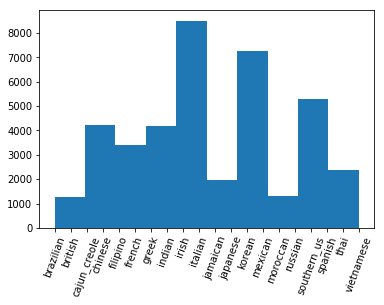

In [18]:
plt.hist(df_train["cuisine"])
plt.xticks(rotation = 70)
plt.show()

In [30]:
df_train.groupby("cuisine")["id"].count().reset_index(name = "Total").sort_values("Total", ascending = False)

,cuisine,Total
9,italian,7838
13,mexican,6438
16,southern_us,4320
7,indian,3003
3,chinese,2673
5,french,2646
2,cajun_creole,1546
18,thai,1539
11,japanese,1423
6,greek,1175


Vamos a analizar la variable de ingredientes

In [102]:
def word_count(dataframe, ref_variable):
    ingredients = []
    
    for list_ing in dataframe[ref_variable]:
        for ing in list_ing:
            ingredients.append(ing)
    
    return pd.Series([collections.Counter(ingredients), list(set(ingredients))])

In [103]:
ingredients_count, list_of_ingredients = word_count(df_train, "ingredients")

In [104]:
list_of_ingredients[:10]

['lily buds',
 'nopalitos',
 'Velveeta',
 'gouda',
 'McCormick Taco Seasoning',
 'coarse sea salt',
 'solid white tuna',
 'veal knuckle',
 'tuna, drain and flake',
 'swanson beef broth']

In [105]:
len(list_of_ingredients)

6714

Vamos a ver cuales son los ingredientes más utilizados

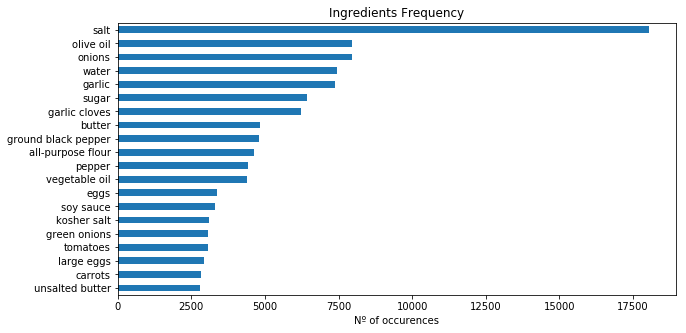

In [106]:
plt.subplots(figsize = (10, 5))

ax = pd.Series(ingredients_count).sort_values(ascending = True)[-20:].plot.barh()
ax.set_xlabel("Nº of occurences")
ax.set_title("Ingredients Frequency") 

plt.show()

Vamos a ver esta misma información pero por tipo de plato

In [145]:
df2 = df_train.groupby("cuisine").apply(word_count, "ingredients").reset_index()
df2.columns = ["cuisine", "Ingredients_Count", "Ingredients"]

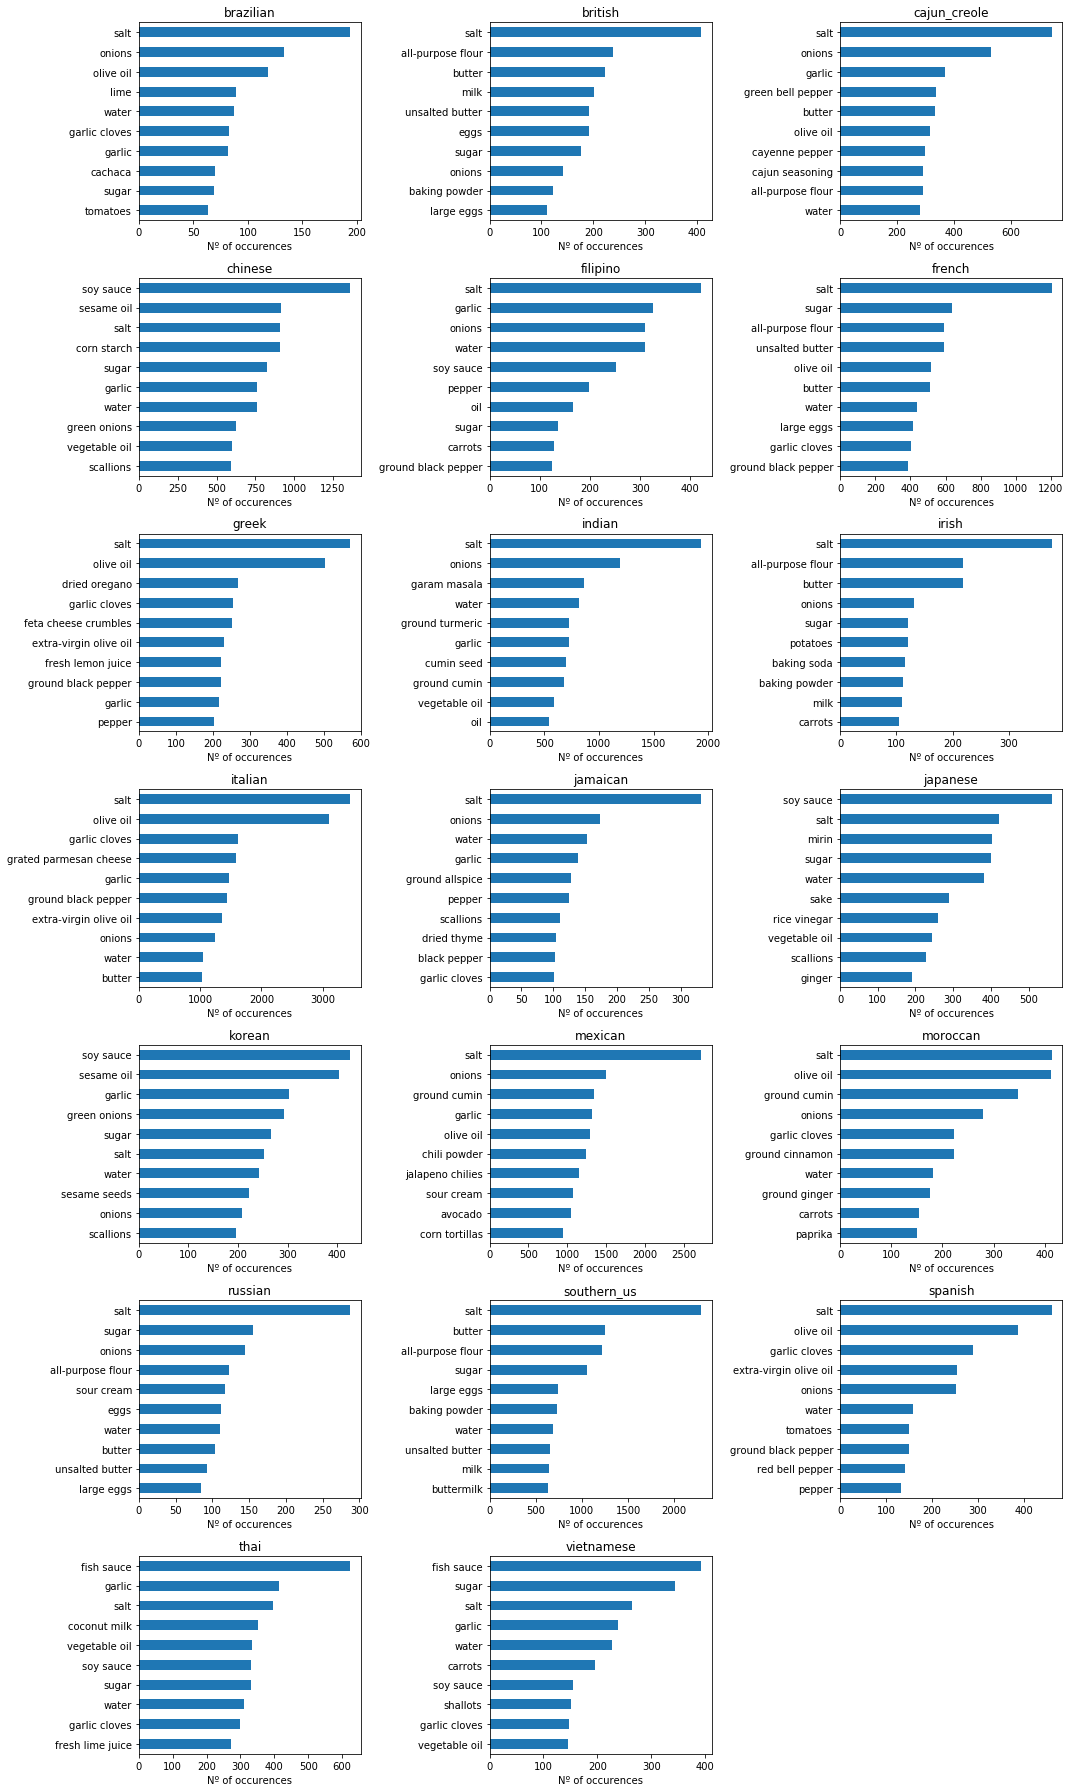

In [198]:
plt.subplots(figsize = (15, 25))

for cuisine, ingredients in zip(df2["cuisine"], df2["Ingredients_Count"]):
    
    n = df2[df2["cuisine"] == cuisine].index.values[0] + 1
    
    plt.subplot(7, 3, n)
    ax = pd.Series(ingredients).sort_values(ascending = True)[-10:].plot.barh()
    ax.set_xlabel("Nº of occurences")
    ax.set_title(cuisine) 

plt.tight_layout()
plt.show()